# Filtrando outliers - dataset Boston Houses

A lo largo de este notebook vamos a ver como filtrar outliers utilizando el concepto de z-score. 

Lo que hace z-score es buscar la distribución de los datos donde la media es 0 y el desvío estandar es 1, es decir, una distribución normal. Esto lo hace analizando como se relaciona cada punto en los datos con el desvío estandar y la media. 

En pocas palabras, es una forma de reescalar los datos para que tengan la forma de una distribución conocida. 

Si asignas un umbral en los valores devueltos por z-score, a partir del cual consideramos los datos como outliers, podemos hacer un filtrado.

En este notebook analizaremos la variable `PTRATIO` que indica el porcentaje de docentes por alumno. 


In [4]:
%matplotlib inline
from sklearn import datasets
import pandas as pd
import numpy as np

boston = datasets.load_boston()
x = boston.data
y = boston.target
columns = boston.feature_names

# Creamos el dataframe con los datos de boston houses
boston_df = pd.DataFrame(boston.data)
boston_df.columns = columns
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


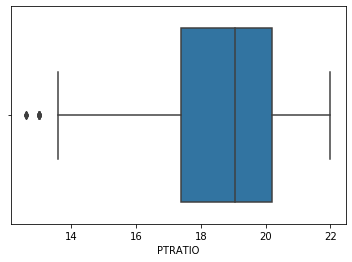

In [5]:
import seaborn as sns
# Graficamos en un boxplot el porcentaje de docentes por estudiante
sns.boxplot(x=boston_df['PTRATIO'])

En este boxplot podemos apreciar la presencia de outlier. Es por eso que vamos a analizar el dataset utilizando z-score.

In [6]:
# Calculamos el z-score de la columna PTRATIO
from scipy import stats
import numpy as np
z = stats.zscore(boston_df.PTRATIO)
print(z)

[-1.45900038 -0.30309415 -0.30309415  0.1130321   0.1130321   0.1130321
 -1.50523663 -1.50523663 -1.50523663 -1.50523663 -1.50523663 -1.50523663
 -1.50523663  1.17646583  1.17646583  1.17646583  1.17646583  1.17646583
  1.17646583  1.17646583  1.17646583  1.17646583  1.17646583  1.17646583
  1.17646583  1.17646583  1.17646583  1.17646583  1.17646583  1.17646583
  1.17646583  1.17646583  1.17646583  1.17646583  1.17646583  0.34421334
  0.34421334  0.34421334  0.34421334 -0.0719129  -0.0719129  -0.2568579
 -0.2568579  -0.2568579  -0.2568579  -0.2568579  -0.2568579  -0.2568579
 -0.2568579  -0.2568579  -0.76545664 -0.76545664 -0.76545664 -0.76545664
  1.22270208 -0.2568579  -0.53427539 -1.55147288  0.57539459  0.57539459
  0.57539459  0.57539459  0.57539459  0.57539459  0.06679585 -1.08911039
 -1.08911039  0.20550459  0.20550459  0.20550459  0.34421334  0.34421334
  0.34421334  0.34421334  0.1130321   0.1130321   0.1130321   0.1130321
  0.1130321   0.1130321   0.25174084  0.25174084  0.251

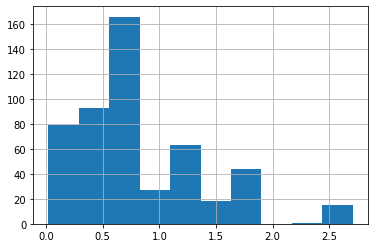

In [7]:
# Hacemos un histograma de los valores absolutos de z (es decir, todos valores positivos)
pd.Series.hist(pd.Series(np.abs(z)))

In [8]:
# Vamos a definir un umbral (threshold) a partir de 2.0 y filtrar lo que se encuentre con
# un z-score sobre él.
threshold = 2
print(np.where(np.abs(z) > threshold))

(array([196, 197, 198, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266,
       267, 268, 283], dtype=int64),)


In [9]:
# Ahora nos vamos a quedar únicamente con los valores dentro del umbral
ptratio_filtered = boston_df.PTRATIO[np.abs(z) < threshold]

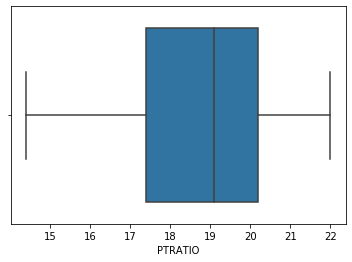

In [10]:
# Graficamos en un boxplot el porcentaje de docentes por estudiante
sns.boxplot(x=ptratio_filtered)